# (99942) Apophis propagation test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
body_id = '99942'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)

In [4]:
e = init_sol['e']
q = init_sol['q']
tp = init_sol['tp']
om = init_sol['om']*np.pi/180.0
w = init_sol['w']*np.pi/180.0
i = init_sol['i']*np.pi/180.0

cometary_elements = [e, q, tp, om, w, i]
ng_params = prop.NongravParamaters()
ng_params.a1 = init_sol.get('a1', 0.0)
ng_params.a2 = init_sol.get('a2', 0.0)
ng_params.a3 = init_sol.get('a3', 0.0)

In [5]:
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)
t0 = init_sol['t']
daysInYear = 365.25
numYears = 20
numDays = numYears * daysInYear
tf = t0 + numDays
prop_sim = prop.propSimulation("(99942) Apophis propagation test", t0, de_kernel, de_kernel_path)

In [6]:
t_temp = t0
t_eval = []
while t_temp <= tf:
    t_eval.append(t_temp)
    t_temp += 1.0

eval_apparent_state = False
t_eval_utc = False
converged_light_time = False
prop_sim.set_integration_parameters(tf, t_eval, t_eval_utc, eval_apparent_state, converged_light_time, tolInteg=1e-4)

In [7]:
apophis = prop.IntegBody(de_kernel_path, "(99942) Apophis", t0, 0.0, 0.0, cometary_elements, init_cov, ng_params, prop_sim.consts)
prop_sim.add_integ_body(apophis)

In [8]:
prop_sim.preprocess()
prop_sim.integrate()

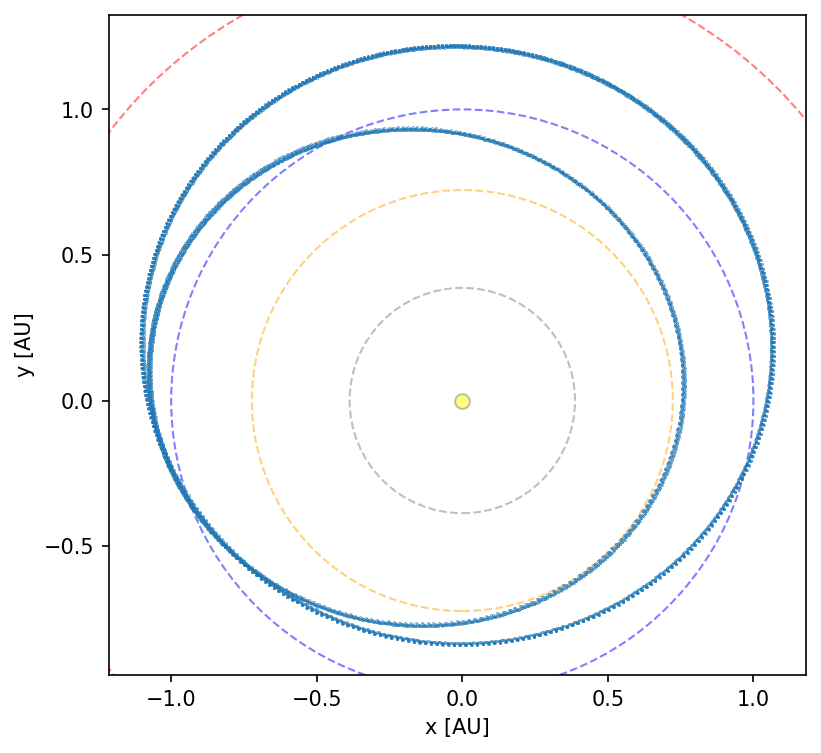

In [9]:
arr = np.array(prop_sim.xIntegEval)
# plot xy and xz projections of the orbit in a 2x1 subplot
plt.figure(figsize=(6, 6), dpi=150)
axs = plt.gca()
prop.plot_solar_system(axs, xy_plane=True, alpha=0.5)
axs.plot(arr[:,0], arr[:,1], '.', markersize=0.5)
axs.set_xlabel("x [AU]")
axs.set_ylabel("y [AU]")
axs.set_aspect('equal')
plt.show()